In [13]:
# 模拟退火算法

from IPython.display import Latex
from IPython.display import display, Math, Latex


def print_latex(latex_str):
    display(Latex(latex_str))
    
    
print_latex(r'优化函数(要使之最小)为: $f:x\rightarrow R^+$')
print_latex(r"给定初始温度$T_0$和初始解$x(0)$, 并由$x_0$生成下一个解$x'\in N[x(0)]$,即$x_0$的邻域")
print_latex(r"这个解是否被接受,依赖于以下概率: $$P(x(k)\rightarrow x')=\left\{\begin{array}{l}1,\qquad f(x')<f(x(k))\\e^{-\frac{f(x')-f(x(k))}{T_i}},\qquad otherwise.\\\end{array}\right.$$")
print_latex(r"这是一个马尔可夫过程")


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

蒙特卡罗算法得到的路径长度: 222200.52746267183
[  0  86  65  84  41  85  23  79  27  55  57  76  87  69  29  58  10  12
  16   3  50  28  83  62  82  20  93  44  74   8  71  25  92  63  54  31
  61   5   1  19  68  60  66  91  43  40  89  81  47  99  72  14  80  26
  64  17  70  15  34  21  88  22  98  48  96  94 100  59  30  51  39  52
  90  33  97  56   4   9   7  13  42  45   6  67  73  46  32  49  36  75
  95  77  11  24  35  53  37  38   2  78  18 101]
模拟退火算法得到的路径长度: 43735.66603479423, 花费时间: 43.73566603479423
[  0  34  76   3 100  92  77  19  17  52  80  15  96  88  70  46  29  53
  94  16  98  62  73  91  14  65  54  35  12  18   4  51  37  71  99  60
  58   9  26  95  13  11   7  41  87  45  89  90  22  42  79  81  21  67
  93  20  27  85  40  56  30  10  97  59  43  47  69  25  50   8  82  23
   6  48  39  57  75  72  55  36  84  32  33   2  49  83  86  24  44  28
  31  78  68  66  38  64   1  63  74   5  61 101]


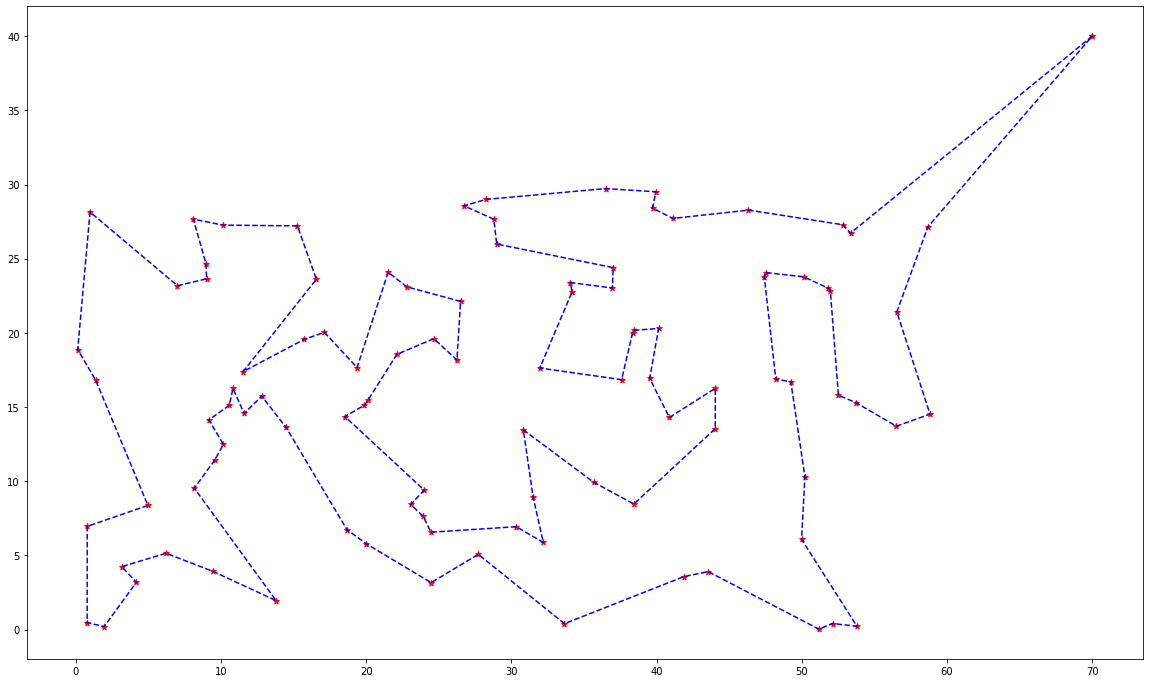

In [2]:
# 课本例题

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 数据读入, reshape
data = np.loadtxt('12.D 飞机侦察地理坐标数据.txt')
data = data.reshape((data.shape[0]*4, 2))
data = np.insert(data, 0, values=[[70,40]],axis=0)
data = np.insert(data, data.shape[0], values=[[70,40]],axis=0)
# np.savetxt('飞机侦察地理坐标数据.txt',a,fmt='%0.4f')

# 地球半径
R = 6370

# 计算间距
d = np.zeros((data.shape[0], data.shape[0]), dtype=np.float)
tempdata = data/180*np.pi
for i in range(len(d)):
    for j in range(i+1, len(d)):
        d[i][j] = R*np.arccos(np.cos(tempdata[i][0]-tempdata[j][0]) * np.cos(tempdata[i][1]) * np.cos(tempdata[j][1])
                              + np.sin(tempdata[i][1]) * np.sin(tempdata[j][1]))
d = d + d.T

np.random.seed(0)
# 先用蒙特卡洛算法求一个较好的初始解, 做1000次
length = np.inf
for times in range(1000):
    temppath = np.array([0], dtype=np.int)
    temppath = np.insert(temppath, 1, values=np.random.permutation([i+1 for i in range(100)]), axis=0)
    temppath = np.insert(temppath, temppath.shape[0], values=[101], axis=0)
    templen = 0
    for i in range(len(temppath)-1):
        templen += d[temppath[i]][temppath[i+1]]
    if templen < length:
        length = templen
        path = temppath
print('蒙特卡罗算法得到的路径长度: {}'.format(length), path, sep='\n')

# 下面用模拟退火算法
# 取降温系数alpha = 0.999, 终止温度e = 1e-30
alpha = 0.999
e = 1e-30
T = 1
for times in range(1000000):
    u, v = np.random.randint(low=1, high=101, size=(2))
    temppath = path.copy()
    temppath[u:v+1] = path[v:u-1:-1]
    # 计算路径长度差
    df = d[path[u-1]][path[v]] + d[path[u]][path[v+1]] - d[path[u-1]][path[u]] - d[path[v]][path[v+1]]
    # 尝试接受调整
    # 事实上, 不去接受增加长度的改变方式, 对结果几乎没有影响.
    # if df < 0:
    if df < 0 or np.exp(-df/T) >= np.random.rand():
        path = temppath
        length += df
    T = T * alpha
    if T < e:
        break
        
length = 0
for i in range(len(path)-1):
    length += d[path[i]][path[i+1]]
    
print('模拟退火算法得到的路径长度: {}, 花费时间: {}'.format(length, length/1000), path, sep='\n')

plt.figure(figsize=(20, 12))
divide = 1
coordinate_path = np.array([[data[i][0], data[i][1]] for i in path])
plt.scatter(coordinate_path[::divide, 0], coordinate_path[::divide, 1], marker='*', color='red')
plt.plot(coordinate_path[::divide, 0], coordinate_path[::divide, 1], 'b--')
    